Not looking for predictions--looking for probabilities!

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./data/cheap_train_sample.csv')

In [3]:
data.shape

(6513, 14)

In [4]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,56,Private,346033,9th,5,Divorced,Adm-clerical,Not-in-family,Male,0,0,40,United-States,<=50K
1,28,Private,96226,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,45,United-States,<=50K
2,33,Private,251120,Bachelors,13,Married-civ-spouse,Sales,Husband,Male,7688,0,50,United-States,>50K
3,26,Private,178140,Bachelors,13,Married-civ-spouse,Other-service,Husband,Male,0,0,45,United-States,>50K
4,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,Female,14084,0,55,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,29,Private,198997,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,Female,0,0,20,United-States,<=50K
6509,17,Private,46496,11th,7,Never-married,Other-service,Own-child,Male,0,0,5,United-States,<=50K
6510,31,Local-gov,381153,Some-college,10,Married-civ-spouse,Protective-serv,Husband,Male,15024,0,56,United-States,>50K
6511,35,Private,385412,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Female,0,0,40,United-States,<=50K


In [5]:
data['wage'].iloc[6511]

' <=50K'

In [6]:
#confirmed that there are no null values
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage              0
dtype: int64

In [7]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
wage              object
dtype: object

In [8]:
# need to clean this withe the ?
data['workclass'].value_counts()

 Private             4545
 Self-emp-not-inc     504
 Local-gov            421
 ?                    363
 State-gov            262
 Self-emp-inc         225
 Federal-gov          189
 Never-worked           2
 Without-pay            2
Name: workclass, dtype: int64

In [9]:
def format_workclass_cell(work_class_cell):
    if work_class_cell == '?':
        return 'Unknown'
    else:
        return work_class_cell

In [10]:
data['workclass'] = data['workclass'].map(lambda x: 'unknown' if x == ' ?' else x)

In [11]:
data['workclass'].iloc[6511]

' Private'

In [12]:
data[data['workclass'] == '?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage


In [13]:
data['workclass'].value_counts()

 Private             4545
 Self-emp-not-inc     504
 Local-gov            421
unknown               363
 State-gov            262
 Self-emp-inc         225
 Federal-gov          189
 Never-worked           2
 Without-pay            2
Name: workclass, dtype: int64

In [14]:
# preschool, really?
data['education'].value_counts()

 HS-grad         2103
 Some-college    1451
 Bachelors       1113
 Masters          334
 Assoc-voc        250
 11th             225
 Assoc-acdm       222
 10th             175
 7th-8th          142
 9th              106
 Prof-school      103
 12th              89
 Doctorate         81
 5th-6th           79
 1st-4th           27
 Preschool         13
Name: education, dtype: int64

In [15]:
data['education-num'].value_counts()

9     2103
10    1451
13    1113
14     334
11     250
7      225
12     222
6      175
4      142
5      106
15     103
8       89
16      81
3       79
2       27
1       13
Name: education-num, dtype: int64

In [16]:
data['marital-status'].value_counts()

 Married-civ-spouse       2978
 Never-married            2135
 Divorced                  898
 Separated                 210
 Widowed                   204
 Married-spouse-absent      81
 Married-AF-spouse           7
Name: marital-status, dtype: int64

In [17]:
data['occupation'] = data['occupation'].map(lambda x: 'unknown' if x == ' ?' else x)

In [18]:
# clean the question marks
data['occupation'].value_counts()

 Exec-managerial      853
 Prof-specialty       840
 Craft-repair         831
 Adm-clerical         761
 Other-service        684
 Sales                681
 Machine-op-inspct    377
unknown               365
 Transport-moving     320
 Handlers-cleaners    268
 Farming-fishing      184
 Tech-support         182
 Protective-serv      129
 Priv-house-serv       36
 Armed-Forces           2
Name: occupation, dtype: int64

In [19]:
data['relationship'].value_counts()

 Husband           2612
 Not-in-family     1665
 Own-child         1019
 Unmarried          701
 Wife               322
 Other-relative     194
Name: relationship, dtype: int64

In [20]:
data['native-country'] = data['native-country'].map(lambda x: 'unknown origin' if x == ' ?' else x)

In [21]:
# need to clean the question marks
data['native-country'].value_counts()

 United-States                 5807
 Mexico                         150
unknown origin                  120
 Philippines                     43
 El-Salvador                     29
 Canada                          26
 Germany                         24
 Dominican-Republic              20
 Jamaica                         18
 South                           18
 Puerto-Rico                     17
 India                           17
 China                           17
 England                         16
 Cuba                            16
 Italy                           15
 Poland                          14
 Japan                           12
 Guatemala                       11
 Columbia                        11
 Haiti                           11
 Iran                            10
 Taiwan                          10
 Peru                             9
 France                           9
 Vietnam                          8
 Cambodia                         6
 Nicaragua                  

In [22]:
data['native-country'].value_counts()

 United-States                 5807
 Mexico                         150
unknown origin                  120
 Philippines                     43
 El-Salvador                     29
 Canada                          26
 Germany                         24
 Dominican-Republic              20
 Jamaica                         18
 South                           18
 Puerto-Rico                     17
 India                           17
 China                           17
 England                         16
 Cuba                            16
 Italy                           15
 Poland                          14
 Japan                           12
 Guatemala                       11
 Columbia                        11
 Haiti                           11
 Iran                            10
 Taiwan                          10
 Peru                             9
 France                           9
 Vietnam                          8
 Cambodia                         6
 Nicaragua                  

In [23]:
# unbalanced class, need to stratify the sample
data['wage'].value_counts()

 <=50K    4945
 >50K     1568
Name: wage, dtype: int64

In [24]:
data['wage'] = data['wage'].map({' >50K': 1, ' <=50K': 0})

In [65]:
# positive class is now greater than $50K in wage
data['wage'].value_counts(normalize==True)

0    0.759251
1    0.240749
Name: wage, dtype: float64

In [26]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
wage               int64
dtype: object

In [27]:
## dummifying object columns
data = pd.get_dummies(data, columns=['workclass'], drop_first=True)


data = pd.get_dummies(data, columns=['education'], drop_first=True)
data = pd.get_dummies(data, columns=['marital-status'], drop_first=True)
data = pd.get_dummies(data, columns=['occupation'], drop_first=True)
data = pd.get_dummies(data, columns=['relationship'], drop_first=True)
data = pd.get_dummies(data, columns=['sex'], drop_first=True)
data = pd.get_dummies(data, columns=['native-country'], drop_first=True)

In [29]:
data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,wage,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_unknown origin
0,56,346033,5,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,28,96226,9,0,0,45,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,33,251120,13,7688,0,50,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,26,178140,13,0,0,45,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,40,56795,14,14084,0,55,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,29,198997,9,0,0,20,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6509,17,46496,7,0,0,5,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6510,31,381153,10,15024,0,56,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6511,35,385412,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [30]:
# more feature engineering with polynomial fit

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
# creating our X & y variables
X = data.drop('wage', axis=1)
y = data['wage']

In [33]:
# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

In [34]:
# Fit and transform our X data.
X_overfit = poly.fit_transform(X)

poly.get_feature_names(X.columns)

In [36]:
X_overfit.shape

(6513, 4655)

In [37]:
# Import train_test_split.
from sklearn.model_selection import train_test_split

In [69]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X_overfit,
    y,
    stratify=y,
    random_state=42
)

In [70]:
print(f'X_train shape is: {X_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'X_test shape is: {X_test.shape}')
print(f'y_test shape is: {y_test.shape}')

X_train shape is: (4884, 4655)
y_train shape is: (4884,)
X_test shape is: (1629, 4655)
y_test shape is: (1629,)


In [71]:
# Import StandardScaler.
from sklearn.preprocessing import StandardScaler
# Instantiate Standard Scaler.
sc = StandardScaler()

# Fit AND transform Standard Scaler to overfit data in one step.
Z_train = sc.fit_transform(X_train)
Z_test = sc.fit_transform(X_test)

# Models from Amit

In [41]:
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [66]:
#Libraries
from collections import Counter
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm
import statsmodels.api as sm
import statsmodels.stats.weightstats as sms
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LogisticRegression
from sklearn.preprocessing import StandardScaler, PowerTransformer,LabelEncoder 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV 
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestRegressor, AdaBoostRegressor 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import roc_auc_score

%matplotlib inline
## change the number of columns visible in the notebook 
pd.set_option('max_columns', 99)

In [72]:
# instantiate/fit a model
lr = LogisticRegression(random_state=42)
#Fit model
model = lr.fit(Z_train, y_train)

import time
# Start our timer.
t0 = time.time()

print()
# Stop our timer and print the result.
print(f'Seconds to execute:',(time.time() - t0))


Seconds to execute: 0.0004191398620605469


In [73]:
lr = LogisticRegression()
       
lr_params = {
    'penalty': ['l2'], # 'l1'],
    'solver': ['lbfgs'],
    'multi_class': ['auto','multinomial'],
    'C': [0.01,.5,1,10],
    }

gs = GridSearchCV(estimator = lr, param_grid=lr_params, cv=5)

In [74]:

gs.fit(Z_train, y_train)
print(gs.best_score_) #best cross_val_score from all params input 
gs.best_params_

predictions_lr = gs.predict_proba(X_test)
predictions_lr = predictions_lr[:,1]
print(roc_auc_score(y_test, predictions_lr))

0.8394758394758395
0.5038265306122449


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_overfit, y, test_size=.33, 
                                                    random_state=42, stratify=y)

sc = StandardScaler()

# Fit AND transform Standard Scaler to overfit data in one step.
Z_train = sc.fit_transform(X_train)
Z_test = sc.fit_transform(X_test)
# Instantiate model with random_state = 42.
dt = DecisionTreeClassifier(random_state = 42)
# Fit DT
dt.fit(X_train, y_train)
# dt_params = {
#     'in_samples_split': [2]
# }
#gs = GridSearchCV(dt, cv=5) #param_grid=dt_params,
#gs.fit(X_train, y_train)

#print(dt.best_score_) #best cross_val_score from all params input 
#gs.best_params_
# Score DT.
print(f'Score - DT training set: {dt.score(X_train, y_train)}')
print(f'Score - DT testing set: {dt.score(X_test, y_test)}')
import time
# Start our timer.
t0 = time.time()
# Let's GridSearch over the above parameters on our training data.
#dt.fit(X_train, y_train)
print()

predictions_dt = dt.predict_proba(X_test)
predictions_dt = predictions_dt[:,1]
print(roc_auc_score(y_test, predictions_dt))
# Stop our timer and print the result.

print(f'Seconds to execute:',(time.time() - t0))

Score - DT training set: 1.0
Score - DT testing set: 0.792093023255814

0.7180982190173366
Seconds to execute: 0.039070844650268555


In [76]:
import time

# Start our timer.
t0 = time.time()

X_train, X_test, y_train, y_test = train_test_split(X_overfit, y, 
                                                  random_state=42, stratify=y)
# Instantiate BaggingClassifier.
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                        random_state = 42)
# Fit BaggingClassifier
#bag.fit(X_train, y_train)
bag_params = {
    'n_estimators': [100],
    'max_features':[1000]
}
gs = GridSearchCV(bag, param_grid=bag_params, cv=5, verbose=2)
gs.fit(X_train, y_train)
print(gs.best_score_) #best cross_val_score from all params input 
gs.best_params_
# Score BaggingClassifier.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_features=1000, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. max_features=1000, n_estimators=100, total=  17.5s
[CV] max_features=1000, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.6s remaining:    0.0s


[CV] .............. max_features=1000, n_estimators=100, total=  17.1s
[CV] max_features=1000, n_estimators=100 .............................
[CV] .............. max_features=1000, n_estimators=100, total=  25.9s
[CV] max_features=1000, n_estimators=100 .............................
[CV] .............. max_features=1000, n_estimators=100, total=  18.1s
[CV] max_features=1000, n_estimators=100 .............................
[CV] .............. max_features=1000, n_estimators=100, total=  18.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.6min finished


0.8488943488943489


{'max_features': 1000, 'n_estimators': 100}

In [77]:
print(f'Score - Bagging DT train set:',gs.score(X_train, y_train))
print(f'Score - Bagging DT test set:', gs.score(X_test, y_test))

# Let's GridSearch over the above parameters on our training data.
#bag.fit(X_train, y_train)
print()

predictions_bag = gs.predict_proba(X_test)
predictions_bag = predictions_bag[:,1]
print(roc_auc_score(y_test, predictions_bag))


# Stop our timer and print the result.
print(f'Seconds to execute:',(time.time() - t0))

Score - Bagging DT train set: 0.8622031122031122
Score - Bagging DT test set: 0.848987108655617

0.912119718542227
Seconds to execute: 138.7276177406311


In [78]:
# Start our timer.
t0 = time.time()

X_train, X_test, y_train, y_test = train_test_split(X_overfit, y, 
                                                  random_state=42, stratify=y)
# Instantiate RF
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
# Fit RF
rf_params = {
    'n_estimators': [100],
    'max_features':[1000]
}
gs_rf = GridSearchCV(rf, param_grid=rf_params, cv=5, verbose=2)
gs_rf.fit(X_train, y_train)
print(gs_rf.best_score_) #best cross_val_score from all params input 
print(gs_rf.best_params_)
print(f'Score - RF train set:',gs_rf.score(X_train, y_train))
print(f'Score - RF test set:',gs_rf.score(X_test, y_test))

predictions_rf = gs_rf.predict_proba(X_test)
predictions_rf = predictions_rf[:,1]
print(roc_auc_score(y_test, predictions_rf))

# Stop our timer and print the result.
print(f'Seconds to execute:',(time.time() - t0))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_features=1000, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. max_features=1000, n_estimators=100, total= 1.2min
[CV] max_features=1000, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV] .............. max_features=1000, n_estimators=100, total= 1.3min
[CV] max_features=1000, n_estimators=100 .............................
[CV] .............. max_features=1000, n_estimators=100, total= 1.1min
[CV] max_features=1000, n_estimators=100 .............................
[CV] .............. max_features=1000, n_estimators=100, total= 1.1min
[CV] max_features=1000, n_estimators=100 .............................
[CV] .............. max_features=1000, n_estimators=100, total=  52.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.6min finished


0.8486895986895987
{'max_features': 1000, 'n_estimators': 100}
Score - RF train set: 0.8591318591318591
Score - RF test set: 0.8465316144874155
0.9106946942075133
Seconds to execute: 381.5696277618408


In [79]:
# Start our timer.
t0 = time.time()

X_train, X_test, y_train, y_test = train_test_split(X_overfit, y, 
                                                  random_state=42, stratify=y)
# Instantiate AB
ada = AdaBoostClassifier()

# #ada_params = {
#      'n_estimators': [100],
#      'max_features':[1000]
# }
# gs_ada = GridSearchCV(ada, param_grid=ada_params, cv=5)
ada.fit(X_train, y_train)
#print(ada.best_score_) #best cross_val_score from all params input 
# gs.best_params_
print(f'Score - AB train set:',ada.score(X_train, y_train))
print(f'Score - AB test set:',ada.score(X_test, y_test))

predictions_ada = ada.predict_proba(X_test)

# Stop our timer and print the result.
print(f'Seconds to execute:',(time.time() - t0))

Score - AB train set: 0.8626126126126126
Score - AB test set: 0.8465316144874155
Seconds to execute: 60.10238289833069


In [80]:
X_test.shape

(1629, 4655)

In [81]:
predictions_ada = predictions_ada[:,1]

In [82]:
preds = []
for i in predictions_ada:
    if i <= 0.4: 
         preds.append(0)
    else:
        preds.append(1)


In [83]:
## plug predictions into ROC AUC (y_test, predictions)

In [84]:
roc_auc_score(y_test, predictions_ada)

0.9047863082177091

In [85]:
# Start our timer.
import time
t0 = time.time()

# Train/Test Split.
X_train, X_test, y_train, y_test = train_test_split(
    X_overfit,
    y,
    test_size=0.33,
    random_state=42
)
# Instantiate support vector machine.
svc = SVC(gamma="scale", probability=True)
# Fit support vector machine to training data.
svc.fit(X_train, y_train)
print(f'Score - SVC train set:',svc.score(X_train, y_train))
print(f'Score - SVC test set:',svc.score(X_test, y_test))

predictions_svc = svc.predict_proba(X_test)

# Stop our timer and print the result.
print(f'Seconds to execute:',(time.time() - t0))

Score - SVC train set: 0.7611735044694018
Score - SVC test set: 0.7679069767441861
Seconds to execute: 615.5417459011078


In [86]:
predictions_svc = predictions_svc[:,1]

In [87]:
roc_auc_score(y_test, predictions_svc)

0.6103894233020128

Exporting predictions to holdout set

In [88]:
# reading in the test data
test_data = pd.read_csv('./data/test_data.csv')


In [93]:
modelfeatures = gs.best_estimator_


In [97]:
modelfeatures

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [100]:
## dummifying object columns
test_data = pd.get_dummies(test_data, columns=['workclass'], drop_first=True)


test_data = pd.get_dummies(test_data, columns=['education'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['marital-status'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['occupation'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['relationship'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['sex'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['native-country'], drop_first=True)

In [101]:
# Fit and transform our X data.
test_data_overfit = poly.fit_transform(test_data)

poly.get_feature_names(test_data.columns)

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupati

In [104]:
predictions_test = gs.predict_proba(test_data_overfit)
predictions_test = predictions_test[:,1]

In [106]:
test_data['wage'] = predictions_test

In [116]:
test_data_submission = test_data[['wage']]

In [117]:
test_data_submission

,wage
0,0.039627
1,0.320555
2,0.273854
3,0.874199
4,0.028983
...,...
16276,0.064500
16277,0.079246
16278,0.566755
16279,0.400176


In [118]:
test_data_submission.to_csv('./final_submission.csv', index=False)

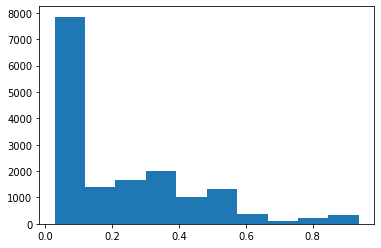

In [119]:
plt.hist(test_data['wage']);